In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Dense, Flatten,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

from keras import Model
from keras.utils import to_categorical
from keras.preprocessing import image
from keras import optimizers

%matplotlib inline

Using TensorFlow backend.


In [2]:
pth='C:\\Users\\ngooty\\Desktop\\DataScience\\Python\\IdentifyApparel'

os.chdir(pth)
train=pd.read_csv("fashion-mnist_train.csv")
test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
len(test),len(train)

(10000, 60000)

In [4]:
merged_df=pd.concat([train,test])
len(merged_df)

70000

In [5]:
features=merged_df.iloc[:,1:785]
label=merged_df.iloc[:,0]

In [6]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
import livelossplot
plot_losses=livelossplot.PlotLossesKeras()
%matplotlib inline

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(features,label, random_state=909, test_size=0.2)

In [9]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [10]:
xtrain=xtrain.as_matrix().reshape(56000,28,28)
xtest=xtest.as_matrix().reshape(14000,28,28)

In [11]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain /=255
xtest /=255

In [12]:
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

In [13]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((56000, 28, 28), (56000, 10), (14000, 28, 28), (14000, 10))

In [14]:
model=Sequential()
model.add(layer=Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [15]:
learning_rate=0.0001
batchsize=20
epochs=5
sgd=optimizers.SGD(lr=learning_rate)
rmsprop=optimizers.RMSprop(lr=learning_rate)

In [16]:
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=(['accuracy']))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


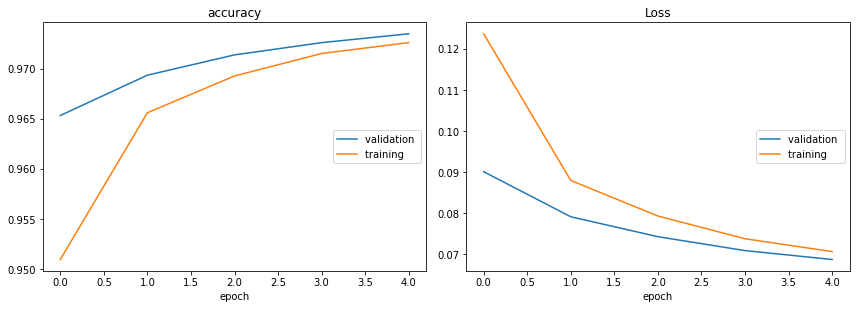

accuracy
	validation       	 (min:    0.965, max:    0.973, cur:    0.973)
	training         	 (min:    0.951, max:    0.973, cur:    0.973)
Loss
	validation       	 (min:    0.069, max:    0.090, cur:    0.069)
	training         	 (min:    0.071, max:    0.124, cur:    0.071)


In [17]:
model.fit(xtrain,ytrain,epochs=epochs,batch_size=batchsize,verbose=1,callbacks=[plot_losses],validation_data=(xtest,ytest))

In [18]:
model.evaluate(xtest,ytest)

14000/14000 [==============================] - 1s 43us/step


[0.06876029310481889, 0.9734858870506287]

In [19]:
def print_test_image(image_index):
    image = xtest[image_index]
    #image = np.array(image, dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()

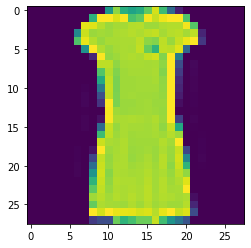

Predicted Label:  Dress


'Dress'

In [20]:
image_index = 728
print_test_image(image_index)
indices=np.argmax(model.predict(xtest[image_index].reshape((-1,28,28))))

print('Predicted Label: ',labels[indices])
#print("Predicted:",np.argmax(model.predict(xtest[image_index].reshape((-1,28,28)))[0]))
#print(labels)
ind=np.argmax(ytest[image_index])
ind
labels[ind]

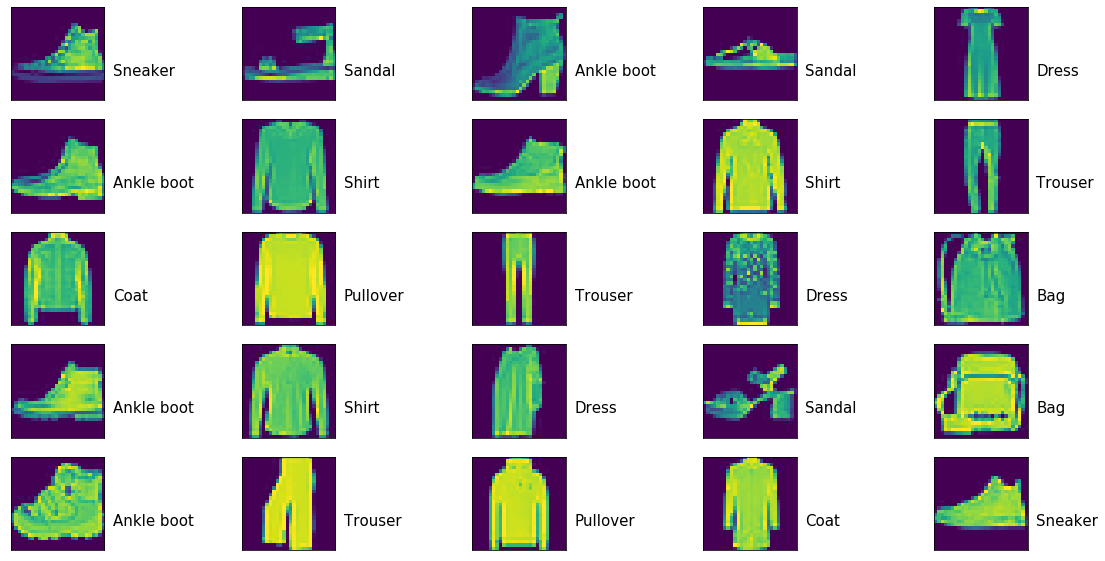

In [23]:
plt.figure(figsize=(20,10))

k=680
for i in range(0,5):
    for j in range(0,5):
        plt.subplot2grid((5,5),(i,j))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xtest[k])
        app_type=np.argmax(ytest[k])
        plt.text(30,20,labels[app_type],fontsize=15)
        k+=1
plt.show()